In [7]:
import pandas as pd
import os
import json

In [4]:
pip install pyreadstat


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
file_path = 'human_coder.sav'
hm_df = pd.read_spss(file_path)

print(hm_df.head())

                                 id  Tech  CurrentNegative  PastNegative  \
0  0CD5A01591584DE1940F418669198AEB   1.0              0.5          6.50   
1                          1.20E+49   1.0              1.0          3.50   
2                             10258   1.0             -1.0          5.00   
3                             10408   1.0              0.5          4.00   
4                             11293   1.5              0.5          3.75   

   Commual  Engage  Defens  Question  PespTak  Simi  VaxImp  BoostImp  \
0      6.0     7.0     1.0       0.5      0.5   1.0     2.5       3.5   
1      5.0     4.0     2.0       0.0      1.0   1.0     5.0       2.5   
2      4.0     6.0     1.0       0.0      0.5   2.5     7.0       6.0   
3      3.0     6.5     1.0       1.0      0.0   0.0     7.0       6.5   
4      7.0     7.0     1.0       5.5      3.5   1.5     7.0       6.5   

   CogComp  SelfOther  
0      3.5       3.00  
1      4.5       2.50  
2      7.0       4.00  
3      5

In [7]:
ranked_pt_df = hm_df.sort_values(by='PespTak', ascending=False)
print(ranked_pt_df.head())  # Display top rows for verification

                                   id  Tech  CurrentNegative  PastNegative  \
4                               11293   1.5              0.5          3.75   
9                               13717   1.0              0.0          7.00   
231  68CDB46365634548A07C5D65711A65B3   1.0             -1.0          2.50   
56                              21103   1.0              1.5          3.50   
90                              24307   1.0              0.0          0.50   

     Commual  Engage  Defens  Question  PespTak  Simi  VaxImp  BoostImp  \
4        7.0     7.0     1.0       5.5      3.5   1.5     7.0       6.5   
9        7.0     7.0     1.0       8.5      3.5   0.0     7.0       7.0   
231      6.0     7.0     1.0       3.5      3.0   0.0     4.5       3.5   
56       7.0     7.0     1.0       1.5      3.0   1.5     7.0       7.0   
90       7.0     7.0     1.0       1.0      2.5   6.0     7.0       7.0   

     CogComp  SelfOther  
4        6.5       5.75  
9        6.5       6.00  
23

In [4]:
unique_ids = hm_df['id'].unique()
print(unique_ids)

['0CD5A01591584DE1940F418669198AEB' '1.20E+49' '10258' '10408' '11293'
 '11542' '13132' '13258' '13306' '13717' '13867' '14044' '15256' '15418'
 '15439' '15442' '15472' '15502' '15523' '15547' '15754' '15817' '15823'
 '15907' '15937' '16114' '16306' '16948' '17668' '17767' '17878'
 '180F3F79E0514EA8A0A0D2FA682C4294' '18268' '18274' '18277' '18670'
 '19012' '19324' '19396' '19423' '19993' '19999' '20005' '20041' '20047'
 '20269' '20344' '20551' '20689' '20809' '20908' '20914' '20950' '20971'
 '21001' '21007' '21103' '21184' '21193' '21277' '21316' '21337' '21364'
 '21370' '21436' '21448' '21646' '21652' '21724' '21826' '21832' '21850'
 '22042' '22054' '22654' '22861' '22876' '22879' '22927' '23311' '23419'
 '23461' '23719' '23767' '23842' '23863' '23887' '23995' '24268' '24304'
 '24307' '24394' '24424' '24460' '24676' '24811' '24919'
 '24BC3A44EAB247DD8A64EE8D7C02D0E5' '26629' '27220' '27490' '27514'
 '27589' '30259' '3046' '3049' '3082' '3166' '3229' '3283' '3307' '3310'
 '3322' '33265

In [19]:
# Create a copy of hm_df
hm_df_truncated = hm_df.copy()

# Truncate the 'id' column to preserve only the first 5 characters for IDs with length > 5
hm_df_truncated['id'] = hm_df_truncated['id'].apply(lambda x: x[:5] if len(x) > 5 else x)

print(hm_df_truncated.head())

      id  Tech  CurrentNegative  PastNegative  Commual  Engage  Defens  \
0  0CD5A   1.0              0.5          6.50      6.0     7.0     1.0   
1  1.20E   1.0              1.0          3.50      5.0     4.0     2.0   
2  10258   1.0             -1.0          5.00      4.0     6.0     1.0   
3  10408   1.0              0.5          4.00      3.0     6.5     1.0   
4  11293   1.5              0.5          3.75      7.0     7.0     1.0   

   Question  PespTak  Simi  VaxImp  BoostImp  CogComp  SelfOther  
0       0.5      0.5   1.0     2.5       3.5      3.5       3.00  
1       0.0      1.0   1.0     5.0       2.5      4.5       2.50  
2       0.0      0.5   2.5     7.0       6.0      7.0       4.00  
3       1.0      0.0   0.0     7.0       6.5      5.0       5.00  
4       5.5      3.5   1.5     7.0       6.5      6.5       5.75  


In [5]:
len(unique_ids)

256

In [3]:
import json
with open('/Users/eveyhuang/Documents/NICO/gemini_code/outputs/NEW_KSM_COVID_videos/output_B4C98/B4C98_Video/B4C98_Video.json', 'r') as f:
    data = json.load(f)

    new_row = []
    all_keys = data.keys()
    for key in all_keys:
        print(f"Processing key: {key}")
        value = data[key]
        annotation = value
        if key in ['questions', 'perspective_statements', 'similarity_statements']:
            annotation = len(value)
        elif type(value) is list and len(value) > 0:
            # If the value is a list, take the first element
            annotation = value[0]
        new_row.append(annotation)
    print(new_row)
print(data)

Processing key: technology
Processing key: cur_neg_affect
Processing key: past_neg_affect
Processing key: communal_orientation
Processing key: engagement
Processing key: defensiveness
Processing key: questions
Processing key: perspective_statements
Processing key: similarity_statements
Processing key: vaccine_importance
Processing key: booster_importance
Processing key: cognitive_complexity
Processing key: general_notes
['1', '1', '3', '5', '6', '1', 3, 0, 0, '-1', '-1', '4', 'The participant is a registered nurse.']
{'technology': ['1', 'There were no technical difficulties during the conversation.'], 'cur_neg_affect': ['1', 'The participant did not express any negative affect about the pandemic/masks/vaccine/boosters in the present.'], 'past_neg_affect': ['3', 'The participant expressed some negative affect about the pandemic when recalling the past, such as feeling concerned and scared for those being affected.'], 'communal_orientation': ['5', 'The participant displayed some behavio

In [32]:
import re
# Create a new DataFrame with the same column names as hm_df
new_df = pd.DataFrame(columns=hm_df.columns)

# Path to the directory containing subfolders with JSON files
base_path = "/Users/eveyhuang/Documents/NICO/gemini_code/outputs/NEW_KSM_COVID_videos"

# Iterate through each subfolder and JSON file
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
                new_row = []
                # Extract the first 5 characters of the file name as "id"
                new_row.append(file[:5])
                all_keys = data.keys()
                for key in all_keys:
                    value = data[key]
                    annotation = value
                    if key in ['questions', 'perspective_statements', 'similarity_statements']:
                        annotation = len(value)
                    elif key == 'Notes':
                        annotation = value
                    elif type(value) is list and len(value) > 0:
                       # If the value is a list, take the first element
                        annotation = value[0]
                        if isinstance(annotation, str) and len(annotation) > 1:
                            annotation = [int(x) for x in re.findall(r'\d+', annotation)][0]
                    new_row.append(annotation)
                print(new_row)
                # Append the data as a new row in the DataFrame
                new_df.loc[len(new_df)] = new_row

print(new_df.head())


['B4C98', '1', '1', '3', '5', '6', '1', 3, 0, 0, 1, 1, '4', 'The participant is a registered nurse.']
['180F3', 1, 2, 3, 5, 6, 1, 4, 0, 1, 7, -1, 4, 'The participant is generally positive and open to sharing their experiences.']
['8781F', '1', '2', '4', '4', '5', '1', 2, 0, 1, '4', 1, '4', 'The participant had an allergic reaction to the vaccine and is now hesitant to get more boosters.']
['12E48', '1', '3', '4', '5', '6', '2', 2, 0, 1, '4', '1', '5', "The participant is skeptical about the COVID vaccine and boosters, but is respectful of others' opinions."]
['086E6', '1', '1', '2', '5', '6', '1', 0, 0, 0, '6', '4', '4', 'The participant was very polite and respectful.']
['39043', 1, 2, 3, 4, 6, 1, 1, 0, 0, -1, -1, 4, 'The participant seems to have had a relatively positive experience during the pandemic, as they were already working remotely and their family stayed safe.']
['6DF63', '1', '1', '2', '4', '5', '1', 2, 0, 0, 1, 1, '4', 'The participant was generally positive and shared th

In [23]:
new_df = new_df.rename(columns={'SelfOther': 'Notes'})

In [43]:
print(new_df)

       id Tech CurrentNegative PastNegative Commual Engage Defens  Question  \
0   B4C98    1               1            3       5      6      1         3   
1   180F3    1               2            3       5      6      1         4   
2   8781F    1               2            4       4      5      1         2   
3   12E48    1               3            4       5      6      2         2   
4   086E6    1               1            2       5      6      1         0   
5   39043    1               2            3       4      6      1         1   
6   6DF63    1               1            2       4      5      1         2   
7   A7D0D    1               2            3       4      5      2         2   
8   50707    1               1            2       4      5      1         1   
9   21103    1               2            3       5      6      1         2   
10  33823    1               2            3       5      6      1         2   
11  B7D21    1               2            3       4 

In [ ]:
from sklearn.metrics import cohen_kappa_score
# Ensure both DataFrames have the same IDs and exclude "Notes" and "SelfOther" columns
columns_to_exclude = ['Notes', 'SelfOther']
hm_df_filtered = hm_df_truncated.drop(columns=columns_to_exclude, errors='ignore')
new_df_filtered = new_df.drop(columns=columns_to_exclude, errors='ignore')

# Merge the filtered DataFrames on 'id'
merged_df = pd.merge(hm_df_filtered, new_df_filtered, on='id', suffixes=('_hm', '_new'))
columns_to_cast = [col for col in merged_df.columns if col != 'id']
merged_df[columns_to_cast] = merged_df[columns_to_cast].astype(float)
print(merged_df.head())


      id  Tech_hm  CurrentNegative_hm  PastNegative_hm  Commual_hm  Engage_hm  \
0  0CD5A      1.0                 0.5              6.5         6.0        7.0   
1  180F3      1.0                 0.0              2.5         6.5        7.0   
2  21103      1.0                 1.5              3.5         7.0        7.0   
3  24BC3      1.0                 1.0              6.5         5.0        7.0   
4  33823      1.0                 2.5              5.5         7.0        6.5   

   Defens_hm  Question_hm  PespTak_hm  Simi_hm  ...  PastNegative_new  \
0        1.0          0.5         0.5      1.0  ...               3.0   
1        1.0          3.5         2.5      2.5  ...               3.0   
2        1.0          1.5         3.0      1.5  ...               3.0   
3        2.5          0.0         0.5      0.5  ...               3.0   
4        1.5          0.0         0.0      0.0  ...               3.0   

   Commual_new  Engage_new  Defens_new  Question_new  PespTak_new  Simi_ne

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [67]:
# Initialize a dictionary to store Cohen's kappa scores for each category
kappa_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_new"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        y_true = merged_df[col_hm].round().astype(int)
        y_pred = merged_df[col_new].round().astype(int)
        kappa = cohen_kappa_score(y_true, y_pred, labels=all_labels, weights='linear')
        kappa_scores[category] = kappa
# Print the Cohen's kappa scores for each category
for category, score in kappa_scores.items():
    print(f"Cohen's kappa for {category}: {score}")

Cohen's kappa for Tech: 0.0
Cohen's kappa for CurrentNegative: 0.07999999999999996
Cohen's kappa for PastNegative: 0.041825095057034245
Cohen's kappa for Commual: 0.022058823529411686
Cohen's kappa for Engage: 0.0
Cohen's kappa for Defens: 0.17204301075268813
Cohen's kappa for Question: 0.25039370078740164
Cohen's kappa for PespTak: 0.0
Cohen's kappa for Simi: 0.12250712250712248
Cohen's kappa for VaxImp: 0.19999999999999996
Cohen's kappa for BoostImp: 0.3870402802101576
Cohen's kappa for CogComp: 0.02506963788300831


In [ ]:
# Initialize a dictionary to store Cohen's kappa scores for each category
simple_agreement_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_new"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        y_true = merged_df[col_hm].round().astype(int)
        y_pred = merged_df[col_new].round().astype(int)
        valid_pairs = [(a, b) for a, b in zip(y_true, y_pred) if a != -1 and b != -1]
        # Count total valid pairs
        n_total = len(valid_pairs)

        # Count agreements
        n_agree = sum(a == b for a, b in valid_pairs)

        # Calculate percent agreement
        percent_agreement = n_agree / n_total if n_total > 0 else float('nan')

        simple_agreement_scores[category] = percent_agreement
# Print the Cohen's kappa scores for each category
for category, score in simple_agreement_scores.items():
    print(f"Simple agreement score for {category}: {score}")



Simple agreement score for Tech: 0.9642857142857143
Simple agreement score for CurrentNegative: 0.19047619047619047
Simple agreement score for PastNegative: 0.07142857142857142
Simple agreement score for Commual: 0.17857142857142858
Simple agreement score for Engage: 0.07142857142857142
Simple agreement score for Defens: 0.6071428571428571
Simple agreement score for Question: 0.21428571428571427
Simple agreement score for PespTak: 0.5
Simple agreement score for Simi: 0.4642857142857143
Simple agreement score for VaxImp: 0.38461538461538464
Simple agreement score for BoostImp: 0.4166666666666667
Simple agreement score for CogComp: 0.32142857142857145
Percent agreement: 32.14%


In [ ]:
pip install pingouin

In [78]:
# Initialize a dictionary to store Cohen's kappa scores for each category
import pingouin as pg

icc_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_new"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        coder_1 = merged_df[col_hm].round().astype(int)
        coder_2 = merged_df[col_new].round().astype(int)
        df = pd.DataFrame({'coder1': coder_1, 'coder2': coder_2})

        # Exclude -1s
        df = df[(df['coder1'] != -1) & (df['coder2'] != -1)]
        # Reshape for pingouin
        df_long = df.melt(var_name='rater', value_name='score', ignore_index=False).reset_index()
        icc = pg.intraclass_corr(data=df_long, targets='index', raters='rater', ratings='score')
       
        icc_scores[category] = icc['ICC'].values[1] if not icc.empty else float('nan')

# Print the Cohen's kappa scores for each category
for category, score in icc_scores.items():
    print(f"ICC score for {category}: {score}")



ICC score for Tech: -9.714451465470118e-17
ICC score for CurrentNegative: 0.15351506456241018
ICC score for PastNegative: 0.12571428571428586
ICC score for Commual: 0.09823182711198457
ICC score for Engage: -0.008791208791209162
ICC score for Defens: 0.2808716707021793
ICC score for Question: 0.4158215010141987
ICC score for PespTak: 0.0
ICC score for Simi: 0.21140472878998595
ICC score for VaxImp: 0.20037231342020664
ICC score for BoostImp: 0.5971337579617836
ICC score for CogComp: 0.17777777777777803


In [82]:
# Create a DataFrame to display kappa scores and simple agreement scores
scores_table = pd.DataFrame({
    'Category': kappa_scores.keys(),
    'Cohen_Kappa_Score': kappa_scores.values(),
    'Simple_Agreement_Score': simple_agreement_scores.values(),
    'ICC_Score': icc_scores.values()
})

print(scores_table.round(3))

           Category  Cohen_Kappa_Score  Simple_Agreement_Score  ICC_Score
0              Tech              0.000                   0.964     -0.000
1   CurrentNegative              0.080                   0.190      0.154
2      PastNegative              0.042                   0.071      0.126
3           Commual              0.022                   0.179      0.098
4            Engage              0.000                   0.071     -0.009
5            Defens              0.172                   0.607      0.281
6          Question              0.250                   0.214      0.416
7           PespTak              0.000                   0.500      0.000
8              Simi              0.123                   0.464      0.211
9            VaxImp              0.200                   0.385      0.200
10         BoostImp              0.387                   0.417      0.597
11          CogComp              0.025                   0.321      0.178


In [123]:
### try analysis of vtt transcripts
# Create a new DataFrame with the same column names as hm_df
vtt_df = pd.DataFrame(columns=hm_df.columns)

# Path to the directory containing subfolders with JSON files
base_path = "/Users/eveyhuang/Documents/NICO/gemini_code/outputs/TEXT_KSM_COVID_videos"

# Iterate through each subfolder and JSON file
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(root, file)
            if file.startswith('ATTN_'):
                old_path = os.path.join(root, file)
                file_path = os.path.join(root, file[5:])  # Remove 'ATTN_' prefix
                try:
                    os.rename(old_path, file_path)
                    print(f"Renamed: {old_path} -> {file_path}")
                except Exception as e:
                    print(f"Error renaming {old_path}: {e}")
            
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
                new_row = []
                # Extract the first 5 characters of the file name as "id"
                new_row.append(file[:5])
                all_keys = data.keys()
                for key in all_keys:
                    value = data[key]
                    annotation = value
                    if key in ['questions', 'perspective_statements', 'similarity_statements']:
                        annotation = len(value)
                    elif key == 'Notes':
                        annotation = value
                    elif type(value) is list and len(value) > 0:
                       # If the value is a list, take the first element
                        annotation = value[0]
                        if isinstance(annotation, str) and len(annotation) > 1:
                            annotation = [int(x) for x in re.findall(r'\d+', annotation)][0]
                    new_row.append(annotation)
                # print(new_row)
                # Append the data as a new row in the DataFrame
                vtt_df.loc[len(vtt_df)] = new_row

print(vtt_df)

       id Tech CurrentNegative PastNegative Commual Engage Defens  Question  \
0   B4C98    1               4            4       4      5      3         2   
1   180F3    1               2            3       5      6      1        12   
2   8781F    1               3            4       5      6      3         5   
3   12E48    1               3            4       4      5      4         0   
4   086E6    1               2            2       4      5      3         5   
5   39043    1               3            4       5      6      1        13   
6   6DF63    1               3            3       5      6      2         7   
7   A7D0D    1               3            4       3      5      3         6   
8   50707    1               2            3       5      6      1         3   
9   21103    1               2            3       6      6      1         5   
10  33823    1               3            4       5      6      2         3   
11  B7D21    1               3            3       5 

In [124]:
vtt_df_filtered = vtt_df.drop(columns=columns_to_exclude, errors='ignore')
column_mapping = {col: col + '_vtt' if col != 'id' else col for col in vtt_df_filtered.columns}
vtt_df_filtered = vtt_df_filtered.rename(columns=column_mapping)
print(vtt_df_filtered.head())


      id Tech_vtt CurrentNegative_vtt PastNegative_vtt Commual_vtt Engage_vtt  \
0  B4C98        1                   4                4           4          5   
1  180F3        1                   2                3           5          6   
2  8781F        1                   3                4           5          6   
3  12E48        1                   3                4           4          5   
4  086E6        1                   2                2           4          5   

  Defens_vtt  Question_vtt  PespTak_vtt  Simi_vtt VaxImp_vtt BoostImp_vtt  \
0          3             2            2         1          3            2   
1          1            12            1         2          6            5   
2          3             5            4         1          2            1   
3          4             0            2         0          2            1   
4          3             5            0         0          3            2   

  CogComp_vtt  
0           4  
1           5  
2 

In [125]:
# Merge the filtered DataFrames on 'id'
vtt_merged_df = pd.merge(merged_df, vtt_df_filtered, on='id')
columns_to_cast = [col for col in vtt_merged_df.columns if col != 'id']
vtt_merged_df[columns_to_cast] = vtt_merged_df[columns_to_cast].astype(float)
print(vtt_merged_df.head())

      id  Tech_hm  CurrentNegative_hm  PastNegative_hm  Commual_hm  Engage_hm  \
0  0CD5A      1.0                 0.5              6.5         6.0        7.0   
1  180F3      1.0                 0.0              2.5         6.5        7.0   
2  21103      1.0                 1.5              3.5         7.0        7.0   
3  24BC3      1.0                 1.0              6.5         5.0        7.0   
4  33823      1.0                 2.5              5.5         7.0        6.5   

   Defens_hm  Question_hm  PespTak_hm  Simi_hm  ...  PastNegative_vtt  \
0        1.0          0.5         0.5      1.0  ...               4.0   
1        1.0          3.5         2.5      2.5  ...               3.0   
2        1.0          1.5         3.0      1.5  ...               3.0   
3        2.5          0.0         0.5      0.5  ...               4.0   
4        1.5          0.0         0.0      0.0  ...               4.0   

   Commual_vtt  Engage_vtt  Defens_vtt  Question_vtt  PespTak_vtt  Simi_vt

In [126]:
import statistics

# Get means, medians, and standard deviations for each category and for human coding, AI coding on videos, AI coding on transcripts
means_hm = {}
means_vd = {}
means_ts = {}
median_hm = {}
median_vd = {}
median_ts = {}
std_hm = {}
std_vd = {}
std_ts = {}

categories = [col for col in hm_df_filtered.columns if col != 'id']

for category in categories:
    col_hm = f"{category}_hm"
    col_vd = f"{category}_new"
    col_ts = f"{category}_vtt"

    if col_hm in vtt_merged_df.columns:
        values_hm = vtt_merged_df[col_hm].dropna().tolist()
        values_vd = vtt_merged_df[col_vd].dropna().tolist()
        values_ts = vtt_merged_df[col_ts].dropna().tolist()

        # Calculate mean, median, and standard deviation for human coding
        means_hm[category] = statistics.mean(values_hm)
        median_hm[category] = statistics.median(values_hm)
        std_hm[category] = statistics.stdev(values_hm)

        # Calculate mean, median, and standard deviation for AI coding on videos
        means_vd[category] = statistics.mean(values_vd)
        median_vd[category] = statistics.median(values_vd)
        std_vd[category] = statistics.stdev(values_vd)

        # Calculate mean, median, and standard deviation for AI coding on transcripts
        means_ts[category] = statistics.mean(values_ts)
        median_ts[category] = statistics.median(values_ts)
        std_ts[category] = statistics.stdev(values_ts)


# Create a table to display the means, medians, and standard deviations
means_table = pd.DataFrame({
    'Category': categories,
    'Mean_Human_Coding': [means_hm[cat] for cat in categories],
    'Mean_AI_Video_Coding': [means_vd[cat] for cat in categories],
    'Mean_AI_Transcript_Coding': [means_ts[cat] for cat in categories],
    'Median_Human_Coding': [median_hm[cat] for cat in categories],
    'Median_AI_Video_Coding': [median_vd[cat] for cat in categories],
    'Median_AI_Transcript_Coding': [median_ts[cat] for cat in categories],
    'Std_Human_Coding': [std_hm[cat] for cat in categories],
    'Std_AI_Video_Coding': [std_vd[cat] for cat in categories],
    'Std_AI_Transcript_Coding': [std_ts[cat] for cat in categories]
})
means_table = means_table.round(3)
print(means_table)

           Category  Mean_Human_Coding  Mean_AI_Video_Coding  \
0              Tech              1.019                 1.000   
1   CurrentNegative              1.093                 1.667   
2      PastNegative              4.796                 2.963   
3           Commual              5.685                 4.333   
4            Engage              6.889                 5.407   
5            Defens              1.370                 1.037   
6          Question              1.352                 1.889   
7           PespTak              1.093                 0.000   
8              Simi              1.074                 0.370   
9            VaxImp              4.685                 3.481   
10         BoostImp              3.593                 2.370   
11          CogComp              4.648                 4.074   

    Mean_AI_Transcript_Coding  Median_Human_Coding  Median_AI_Video_Coding  \
0                       1.000                  1.0                     1.0   
1          

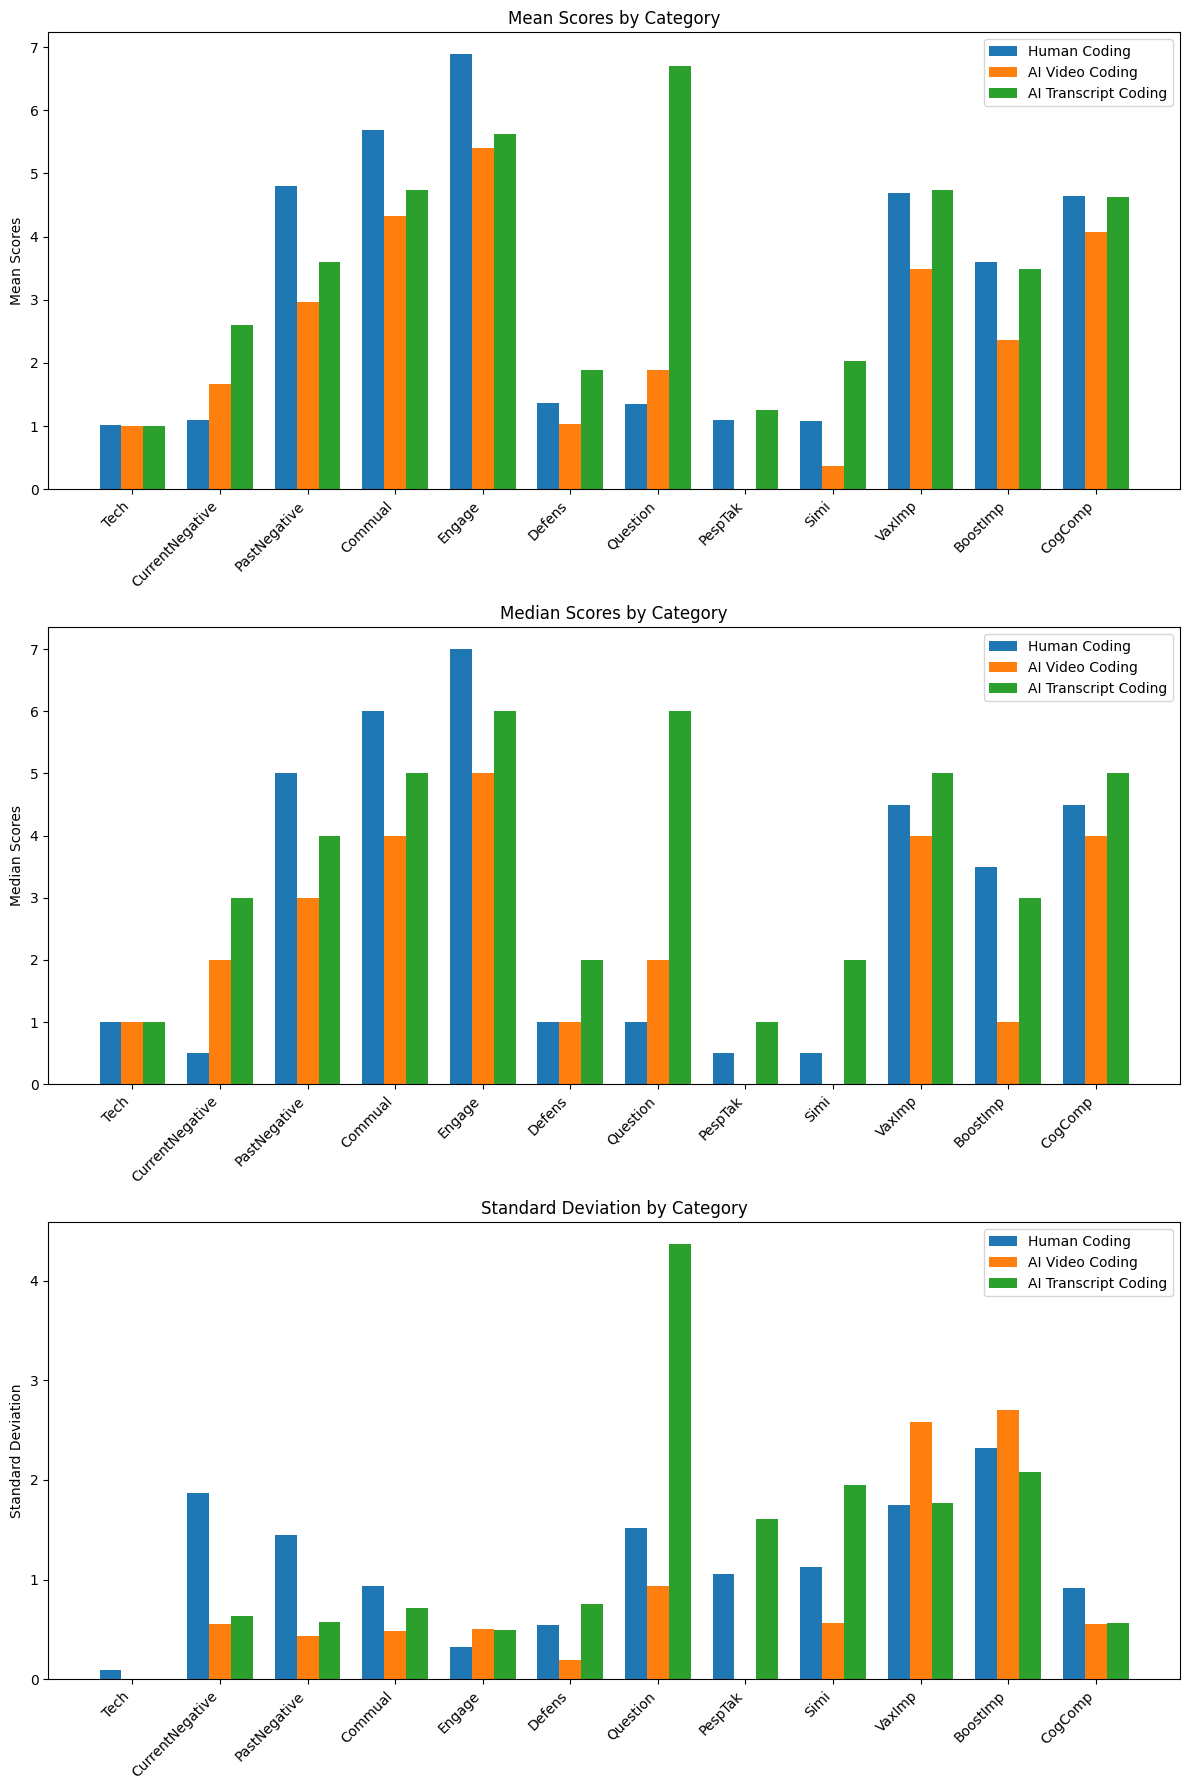

In [128]:
import matplotlib.pyplot as plt

# Set the figure size
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Extract categories
categories = means_table['Category']
x = range(len(categories))

# Plot mean values
axes[0].bar(x, means_table['Mean_Human_Coding'], width=0.25, label='Human Coding', align='center')
axes[0].bar([i + 0.25 for i in x], means_table['Mean_AI_Video_Coding'], width=0.25, label='AI Video Coding', align='center')
axes[0].bar([i + 0.5 for i in x], means_table['Mean_AI_Transcript_Coding'], width=0.25, label='AI Transcript Coding', align='center')
axes[0].set_xticks([i + 0.25 for i in x])
axes[0].set_xticklabels(categories, rotation=45, ha='right')
axes[0].set_ylabel('Mean Scores')
axes[0].set_title('Mean Scores by Category')
axes[0].legend()

# Plot median values
axes[1].bar(x, means_table['Median_Human_Coding'], width=0.25, label='Human Coding', align='center')
axes[1].bar([i + 0.25 for i in x], means_table['Median_AI_Video_Coding'], width=0.25, label='AI Video Coding', align='center')
axes[1].bar([i + 0.5 for i in x], means_table['Median_AI_Transcript_Coding'], width=0.25, label='AI Transcript Coding', align='center')
axes[1].set_xticks([i + 0.25 for i in x])
axes[1].set_xticklabels(categories, rotation=45, ha='right')
axes[1].set_ylabel('Median Scores')
axes[1].set_title('Median Scores by Category')
axes[1].legend()

# Plot standard deviation values
axes[2].bar(x, means_table['Std_Human_Coding'], width=0.25, label='Human Coding', align='center')
axes[2].bar([i + 0.25 for i in x], means_table['Std_AI_Video_Coding'], width=0.25, label='AI Video Coding', align='center')
axes[2].bar([i + 0.5 for i in x], means_table['Std_AI_Transcript_Coding'], width=0.25, label='AI Transcript Coding', align='center')
axes[2].set_xticks([i + 0.25 for i in x])
axes[2].set_xticklabels(categories, rotation=45, ha='right')
axes[2].set_ylabel('Standard Deviation')
axes[2].set_title('Standard Deviation by Category')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
icc_hm_vd_scores = {}
icc_hm_ts_scores = {}
icc_vd_ts_scores = {}
list_of_scores = [icc_hm_vd_scores, icc_hm_ts_scores, icc_vd_ts_scores]
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_vd = f"{category}_new"
    col_ts = f"{category}_vtt"
    
    if col_hm in vtt_merged_df.columns and col_vd in vtt_merged_df.columns:
       
        coder_hm = vtt_merged_df[col_hm]
        coder_vd = vtt_merged_df[col_vd]
        coder_ts = vtt_merged_df[col_ts]
        
        df_hm_vd = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_vd})
        df_hm_ts = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_ts})
        df_vd_ts = pd.DataFrame({'coder1': coder_vd, 'coder2': coder_ts})

        list_of_dfs = [df_hm_vd, df_hm_ts, df_vd_ts]
        for i in range(len(list_of_dfs)):
            df = list_of_dfs[i]
            df = df[(df['coder1'] != -1) & (df['coder2'] != -1)]
            
            df_long = df.melt(var_name='rater', value_name='score', ignore_index=False).reset_index()
            icc = pg.intraclass_corr(data=df_long, targets='index', raters='rater', ratings='score')
            
            scores = list_of_scores[i]
            scores[category] = icc['ICC'].values[1] if not icc.empty else float('nan')

/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/pingouin/reliability.py:312: RuntimeWarning: invalid value encountered in scalar divide
  icc1 = (msb - msw) / (msb + (k - 1) * msw)
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/pingouin/reliability.py:313: RuntimeWarning: invalid value encountered in scalar divide
  icc2 = (msb - mse) / (msb + (k - 1) * mse + k * (msj - mse) / n)
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/pingouin/reliability.py:314: RuntimeWarning: invalid value encountered in scalar divide
  icc3 = (msb - mse) / (msb + (k - 1) * mse)
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/pingouin/reliability.py:315: RuntimeWarning: invalid value encountered in scalar divide
  icc1k = (msb - msw) / msb
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/pingouin/reliability.py:316: RuntimeWarning: invalid value encountered in scalar divide
  icc2k = (msb - mse) / (msb + (msj - ms

In [142]:
# Create a DataFrame to display kappa scores and simple agreement scores
icc_scores_table = pd.DataFrame({
    'Category': kappa_scores.keys(),
    
    'Human vs AI video': icc_hm_vd_scores.values(),
    'Human vs AI transcript': icc_hm_ts_scores.values(),
    'AI video vs AI transcript': icc_vd_ts_scores.values()
})

# apply gradient to the cell backgrounds
styled_table = (icc_scores_table.round(3)).style.background_gradient(cmap='RdYlGn')

styled_table


,Category,Human vs AI video,Human vs AI transcript,AI video vs AI transcript
0,Tech,0.000000,0.000000,nan
1,CurrentNegative,0.214000,0.248000,0.116000
2,PastNegative,0.059000,0.326000,0.221000
3,Commual,0.141000,0.234000,0.117000
4,Engage,-0.024000,0.036000,0.157000
5,Defens,0.023000,0.250000,0.065000
6,Question,0.409000,0.115000,0.082000
7,PespTak,-0.000000,0.335000,0.000000
8,Simi,0.218000,0.365000,0.064000
9,VaxImp,0.147000,0.696000,0.347000
